   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  Target
0   0.659924   0.075805  -0.677162  -1.158068   0.865620   0.963360       0
1   0.244121  -0.108760   0.401712  -0.782841   1.208527   1.137462       0
2  -1.207273   1.441273  -1.435862   1.658822  -0.431315  -0.749202       1
3  -1.191372   2.189803  -0.808298   1.173294   0.736444   0.282479       1
4  -1.604993  -0.208122  -0.493001   1.985223  -0.021852  -0.511036       1
        Feature_1   Feature_2   Feature_3   Feature_4   Feature_5   Feature_6  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     0.038332    0.093692   -0.030409   -0.027714   -0.048848   -0.031206   
std      1.274375    1.060650    0.848964    1.323957    1.230126    0.894988   
min     -2.683180   -3.241267   -1.952088   -2.585909   -2.523434   -1.692005   
25%     -0.989945   -0.716089   -0.605838   -1.185113   -1.097573   -0.819243   
50%     -0.098046    0.086400   -0.087131    0.069846   -0

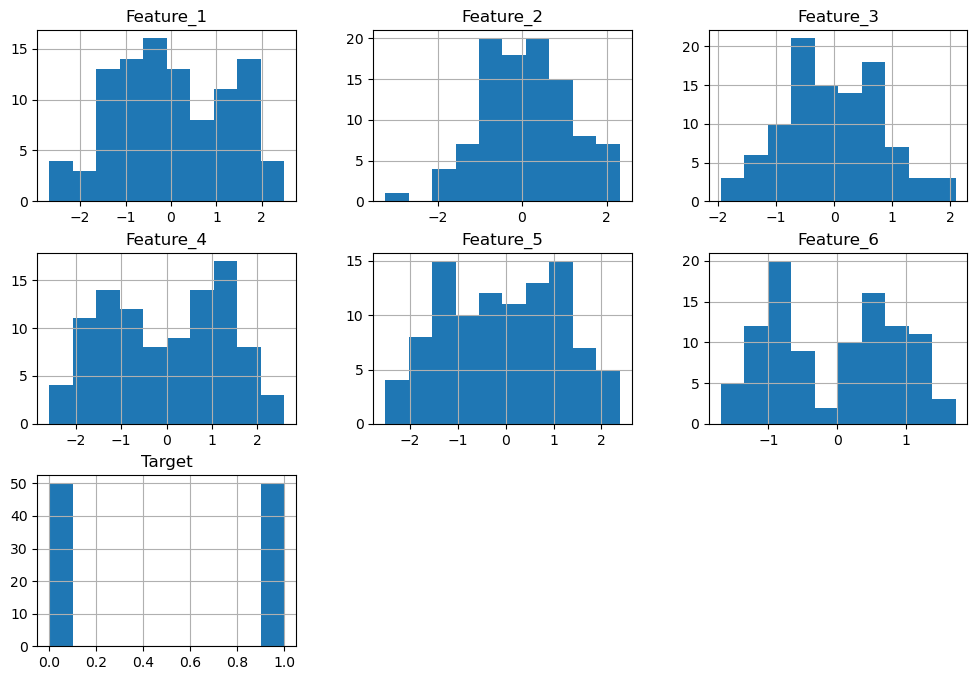

KeyError: "['target'] not found in axis"

In [1]:
#(DAY-45-ASSIGNMENT)#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv(r"C:\Users\madha\Downloads\Day 45 Feature_Engineering_Data.csv")
print(df.head())
print(df.describe())
print(df.isnull().sum())
df.hist(figsize=(12, 8))
plt.show()
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
feature_importance_dt = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance_dt)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance_rf)
top_features = feature_importance_rf.index[:3]
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
dt_model.fit(X_train_selected, y_train)
y_pred = dt_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
